[코로나(COVID)-19 현황 | 경기도 감염병관리지원단](http://www.gidcc.or.kr/%ec%bd%94%eb%a1%9c%eb%82%98covid-19-%ed%98%84%ed%99%a9/)

* http://www.gidcc.or.kr/%ec%bd%94%eb%a1%9c%eb%82%98covid-19-%ed%98%84%ed%99%a9/

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font="AppleGothic", rc={"axes.unicode_minus": False})

In [2]:
df = pd.read_csv("data/covid19_gg.csv")
df.shape

(1508, 28)

In [3]:
df.head()

,연번,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,...,연령대별 비율,지역 (group),지역 + 시,"필터(무증상,조사중 제외)","필터(무증상,조사중 제외)(복사본)",확진일-증상발현일,확진일-증상발현일_무증상조사중포함,레코드 수,무증상자수,최종_무증상자수
0,1,#3,M,54,50,2020. 1. 26.,2020. 1. 22.,,고양-1,고양일산서,...,50대,고양,고양시,참,참,4,4일,1,0,0
1,2,#4,M,55,50,2020. 1. 27.,2020. 1. 25.,,평택-1,평택,...,50대,평택,평택시,참,참,2,2일,1,0,0
2,3,#12,M,49,40,2020. 2. 1.,2020. 1. 20.,,부천-1,부천,...,40대,부천,부천시,참,참,12,12일,1,0,0
3,4,#14,F,40,40,2020. 2. 2.,2020. 1. 29.,,부천-2,부천,...,40대,부천,부천시,참,참,4,4일,1,0,0
4,5,#15,M,42,40,2020. 2. 2.,2020. 2. 1.,,수원-1,수원장안,...,40대,수원,수원시,참,참,1,1일,1,0,0


In [4]:
pd.options.display.max_columns = 50

In [5]:
df.tail()

,연번,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,재양성,감염경로,GRP,구분2,"""구분""",구분,"기준일(발병일, 확진일 선택)",무증상/조사중 기준일,연령대별 비율,지역 (group),지역 + 시,"필터(무증상,조사중 제외)","필터(무증상,조사중 제외)(복사본)",확진일-증상발현일,확진일-증상발현일_무증상조사중포함,레코드 수,무증상자수,최종_무증상자수
1503,1296,#13176,F,42,40,2020. 7. 6.,NaN,무증상,안산-37,안산단원,,해외유입,grp434,,구분,index? 접촉자?,2020. 7. 6.,2020. 7. 6.,40대,안산,안산시,참,참,-,무증상,1,1,1
1504,1040,#12096,F,55,50,2020. 6. 14.,NaN,무증상,평택-56,평택,,해외유입,grp326,,구분,index,2020. 6. 14.,2020. 6. 14.,50대,평택,평택시,참,참,-,무증상,1,1,1
1505,1315,#13238,F,68,60,2020. 7. 7.,NaN,무증상,안성-7,안성,,해외유입,grp442,,구분,index,2020. 7. 7.,2020. 7. 7.,60대,안성,안성시,참,참,-,무증상,1,1,1
1506,1045,#12121,F,58,50,2020. 6. 14.,NaN,조사중,부천-148,부천,,불명확,grp286,타지역에서index가있는건,구분,접촉자,2020. 6. 14.,2020. 6. 14.,50대,부천,부천시,참,참,-,조사중,1,0,0
1507,1042,#12101,F,58,50,2020. 6. 14.,NaN,조사중,안산-21,안산,,불명확,grp297,타지역에서index가있는건,구분,접촉자,2020. 6. 14.,2020. 6. 14.,50대,안산,안산시,참,참,-,조사중,1,0,0


In [6]:
df.columns

Index(['연번', '확진자', '성별', '나이(만)', '연령대', '확진일자', '증상발현일', '무증상/조사중', '경기번호',
       '지역', '재양성', '감염경로', 'GRP', '구분2', '"구분"', '구분', '기준일(발병일, 확진일 선택)',
       '무증상/조사중 기준일', '연령대별 비율', '지역 (group)', '지역 + 시 ', '필터(무증상,조사중 제외)',
       '필터(무증상,조사중 제외)(복사본)', '확진일-증상발현일', '확진일-증상발현일_무증상조사중포함', '레코드 수',
       '무증상자수', '최종_무증상자수'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   연번                   1508 non-null   int64 
 1   확진자                  1507 non-null   object
 2   성별                   1508 non-null   object
 3   나이(만)                1508 non-null   int64 
 4   연령대                  1508 non-null   int64 
 5   확진일자                 1508 non-null   object
 6   증상발현일                990 non-null    object
 7   무증상/조사중              1508 non-null   object
 8   경기번호                 1508 non-null   object
 9   지역                   1508 non-null   object
 10  재양성                  1508 non-null   object
 11  감염경로                 1508 non-null   object
 12  GRP                  1508 non-null   object
 13  구분2                  1508 non-null   object
 14  "구분"                 1508 non-null   object
 15  구분                   1505 non-null   object
 16  기준일(발병

In [8]:
del df['"구분"']

In [9]:
df_nunique = df.nunique()
df_nunique

연번                     1508
확진자                    1507
성별                        2
나이(만)                    95
연령대                      10
확진일자                    160
증상발현일                   157
무증상/조사중                   3
경기번호                   1508
지역                       47
재양성                      23
감염경로                      7
GRP                     539
구분2                       7
구분                       11
기준일(발병일, 확진일 선택)        160
무증상/조사중 기준일             160
연령대별 비율                  10
지역 (group)               30
지역 + 시                   30
필터(무증상,조사중 제외)            1
필터(무증상,조사중 제외)(복사본)       1
확진일-증상발현일                25
확진일-증상발현일_무증상조사중포함       26
레코드 수                     1
무증상자수                     2
최종_무증상자수                  2
dtype: int64

In [10]:
object_data = df_nunique[(df_nunique < 25) & (df_nunique > 1)]
cols_object = object_data.index
cols_object

Index(['성별', '연령대', '무증상/조사중', '재양성', '감염경로', '구분2', '구분', '연령대별 비율', '무증상자수',
       '최종_무증상자수'],
      dtype='object')

In [11]:
cols_len = len(cols_object)
cols_len

10

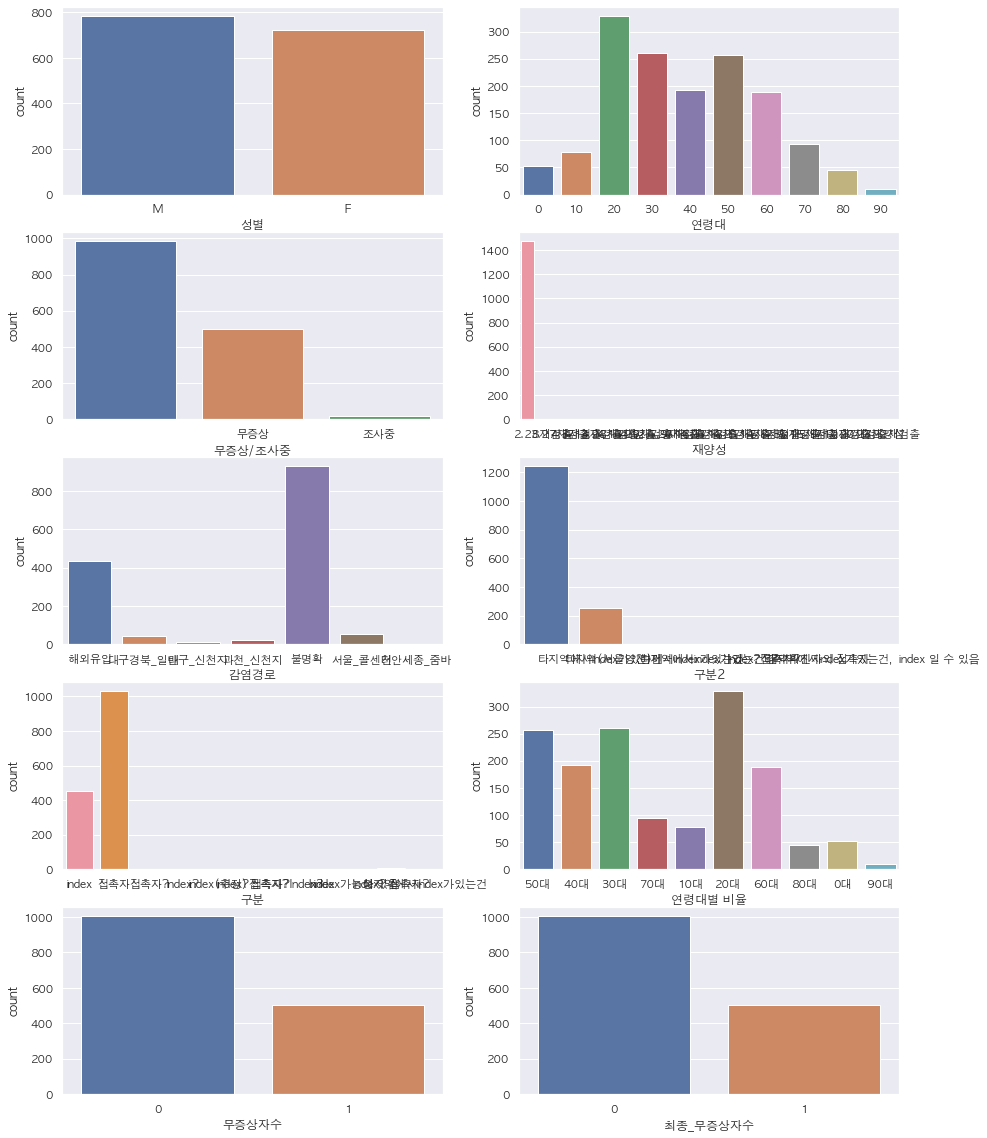

In [12]:
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
for i, col_name in enumerate(cols_object):
    row = i // 2
    col = i % 2
    sns.countplot(data=df, x=col_name, ax=axes[row][col])

In [13]:
df["연도"] = df["확진일자"].str.split(".", expand=True)[0].str.strip()
df["월"] = df["확진일자"].str.split(".", expand=True)[1].str.strip()
df["일"] = df["확진일자"].str.split(".", expand=True)[2].str.strip()

In [14]:
df["지역 (group)"].value_counts()

부천     187
성남     183
평택     138
용인     120
수원     112
군포      80
고양      74
안양      72
의정부     69
안산      53
남양주     52
화성      48
김포      42
광주      39
포천      38
시흥      35
광명      35
파주      23
이천      17
양주      14
구리      13
하남      13
과천      12
의왕      11
안성       9
오산       8
동두천      6
가평       2
여주       2
양평       1
Name: 지역 (group), dtype: int64

In [15]:
df["지역"].value_counts()

부천       187
평택       105
성남수정      84
군포        80
성남분당      72
의정부       69
용인기흥      54
용인수지      50
화성        48
남양주       47
수원영통      45
김포        42
안양동안      41
광주        39
포천        38
고양덕양      38
시흥        35
광명        35
평택송탄      32
안양만안      31
수원장안      27
성남중원      27
안산단원      26
안산상록      25
파주        23
고양일산서     22
수원권선      18
수원팔달      18
이천        17
용인처인      16
양주        14
구리        13
하남        13
과천        12
의왕        11
고양일산동     11
안성         9
오산         8
동두천        6
남양주풍양      5
수원         4
고양         3
여주         2
가평         2
안산         2
양평         1
평택안중       1
Name: 지역, dtype: int64

In [16]:
df["성별"].value_counts()

M    784
F    724
Name: 성별, dtype: int64

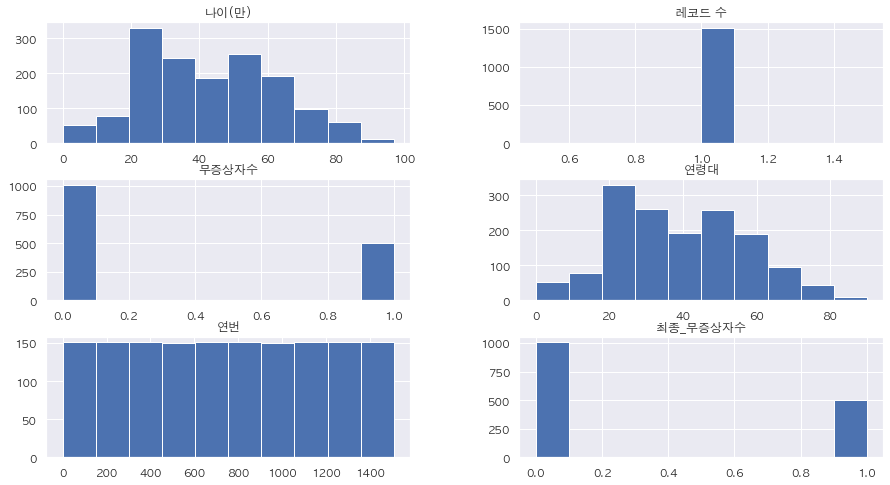

In [17]:
h = df.hist(figsize=(15, 8))

In [18]:
df["재양성"].nunique()

23

In [19]:
df["재양성"].unique()

array([' ', '2.28재검출', '3.27재검출', '4.3재검출', '4.14재검출', '3.28재검출',
       '4.13재검출', '4.29재검출', '4.12,5.9재검출', '4.28재검출', '4.16재검출',
       '4.23재검출', '4.18재검출', '4.21재검출', '5.14재검출', '5.8재검출', '4.30재검출',
       '5.15재검출', '5.9재검출', '7.10재검출', '7.20재검출', '7.23재양성', '7.22재검출'],
      dtype=object)

In [20]:
df["감염경로"].value_counts()

불명확        932
해외유입       437
서울_콜센터      54
대구경북_일반     44
과천_신천지      22
대구_신천지      15
천안세종_줌바      4
Name: 감염경로, dtype: int64

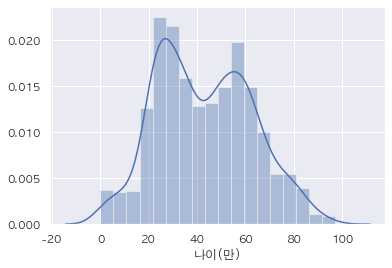

In [21]:
sns.distplot(df["나이(만)"])

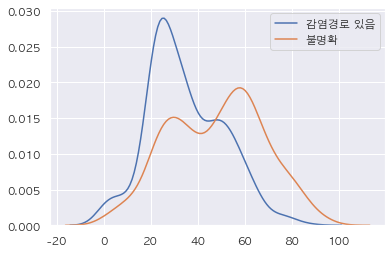

In [22]:
age = df.loc[df["감염경로"] != "불명확", "나이(만)"]
null_age = df.loc[df["감염경로"] == "불명확", "나이(만)"]
sns.kdeplot(age, label="감염경로 있음")
sns.kdeplot(null_age, label="불명확")

In [23]:
age_count = df["연령대별 비율"].value_counts().sort_index()
age_count

0대      52
10대     78
20대    329
30대    261
40대    193
50대    257
60대    189
70대     94
80대     45
90대     10
Name: 연령대별 비율, dtype: int64

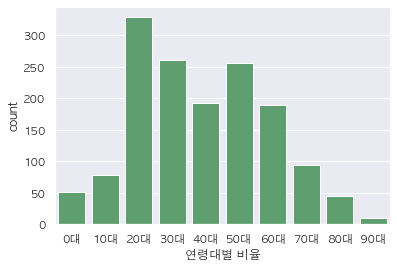

In [24]:
sns.countplot(data=df, x="연령대별 비율", order=age_count.index, color="g")